> **Master's Degree in Data Sciences** | EAFIT University  
> **Course:** Fundamentals of Data Science    
> **Group:** Sara Martinez Rendon (smartiner4@eafit.edu.co) | Heider Zapata (hzapata1@eafit.edu.co) | Yeison Londoño (ylondon4@eafit.edu.co)  
> **Date:** 15/02/2026
---

# **Final Project** | Fundamentals of Data Science    

---

## 1. Business Understanding and Problem Context

This section outlines the business environment, the specific operational pain points, and the strategic justification for implementing a Machine Learning solution.

* **Business Description:** What is the organization or sector about?
    The organization is **Universidad EAFIT**, specifically focusing on the **Academic Registry Office** (*Oficina de Registro Académico*) and the Vice-Rectory of Learning. The sector is higher education, dealing with the complex logistics of planning and scheduling undergraduate academic courses. The process relies on a rich historical dataset (**2018-2026**) containing student behavior, enrollment flows, and institutional capacity constraints.

* **Problem Context:** What specific pain point or need are we addressing?
    Currently, the academic scheduling process is manual and reactive. It relies heavily on raw **Pre-registration** data, which acts as a "noisy" signal of intent rather than a guarantee of enrollment. Historical analysis reveals critical data gaps (e.g., the **2022 system blackout**) and behavioral inconsistencies (e.g., "Cold Start" for new subjects) that a manual process cannot correct. This results in a persistent gap between **Supply** (Groups Opened) and **Demand** (Actual Students), causing operational friction, financial inefficiencies from last-minute group closures, and administrative rework.

* **Justification:** Why is it relevant to solve this problem now?
    It is crucial to transition from intuitive estimation to a **predictive data-driven approach**. By implementing a **Random Forest Regressor**, the university can now forecast the exact number of enrolled students (`Total_Inscritos`) with a high degree of accuracy (**$R^2 \approx 0.80$**), effectively handling outliers and historical anomalies. This solution allows the administration to:
    1.  **Anticipate Demand:** Predict student volume with a margin of error of **~15 students (MAE)**, allowing for precise classroom sizing.
    2.  **Recover Lost Data:** Utilize imputation strategies to learn from years with missing records (like 2022).
    3.  **Optimize Resources:** Shift the focus from "putting out fires" to strategic planning, aiming to reduce the mismatch between opening and closing groups.

---

## 2. Data Selection and Origin

**Select a dataset of interest and indicate where it was obtained.**

* **Dataset:** The project utilizes seven datasets in Excel format (`.xlsx`).
* **Source:** Internal data from **Universidad EAFIT** corresponding to the academic programming and pre-enrollment records for the period **2022-2026**.
* **Key Variables:**
    * Subjects (Asignaturas)
    * Groups per subject
    * Schedules (Horarios)
    * Group capacity
    * Registered students per subject (Matrícula vs. Pre-matrícula)
* **Initial Data Assessment:**
    * **Missing Values:** Yes, the dataset contains missing values (NaN).
    * **Duplicates:** Yes, duplicate records have been identified.
    * **Inconsistencies:** No major inconsistencies observed so far.
    * **Correlations:** There are closely related variables, specifically between pre-enrollment figures and final enrollment.

---

## 3. Justification and Value Added

**Justification of the dataset with the value added it could give to the business.**

* **Limitations of the Current Process:**
    * Currently, decision-making is based **exclusively on pre-enrollment figures**, omitting key factors such as historical behavior and approval rates.
    * The process is **manual and reactive**, leading to operational inefficiencies and a high volume of last-minute adjustments (closing or opening groups) at the start of the semester.

* **Advantages of Analyzing this Dataset (Value Proposition):**
    * **Strategic Automation:** Analyzing this historical data (2022-2026) allows for the transition from a manual process to a **predictive analytical model**.
    * **Resource Optimization:** The model aims to minimize the "mismatch rate" between offered and demanded courses. This directly reduces the administrative burden of closing unnecessary groups or scrambling to open new ones.
    * **Operational Efficiency:** By automating the forecasting of necessary groups, administrative staff can shift focus from tedious operational tasks to high-impact strategic activities for the institution.
    * By implementing a regression model, the university aims to reduce the mismatch between projected supply and actual student demand. **Strategic Automation:** The transition from manual estimation to a **predictive analytical model** allows the university to forecast exact demand (`Total_Inscritos`) with an accuracy of **$R^2 \approx 0.8$**, effectively automating the "easy" decisions and flagging only complex cases for human review.
---

---

## 8. (Optional) Predictive Modeling

Application of Machine Learning algorithms.

### 8.1. Model Training
* Data Splitting (Train/Test).
* Algorithm Selection.

#### **Features analysis sumarize for algorithm selection**

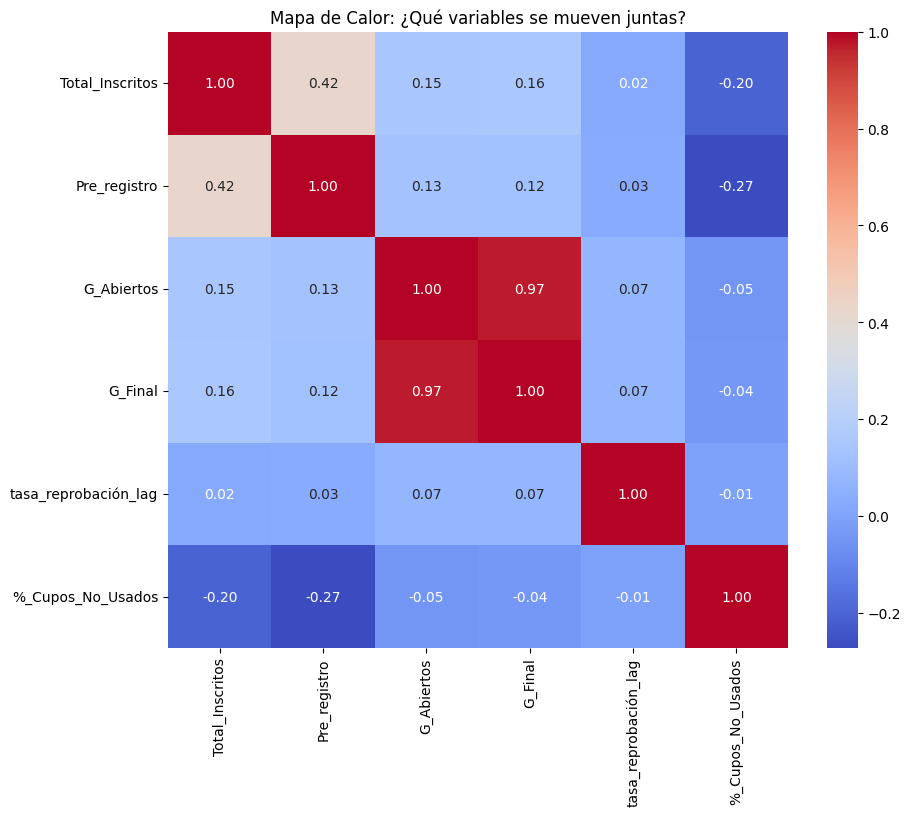

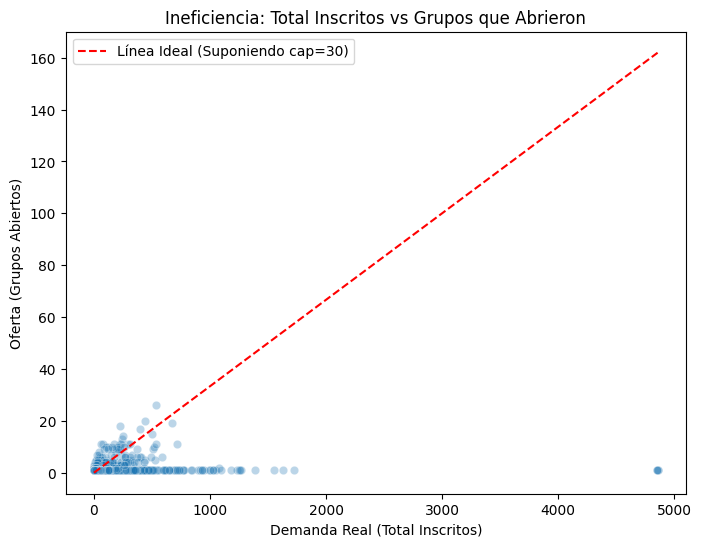

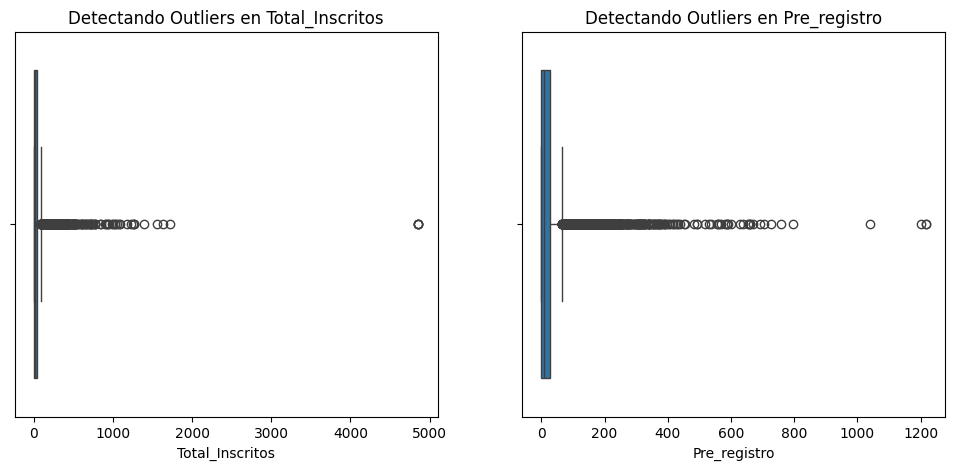

In [ ]:


# 1. Matriz de Correlación (Para ver quién manda)
# Filtramos solo columnas numéricas
cols_numericas = ['Total_Inscritos', 'Pre_registro', 'G_Abiertos', 'G_Final', 
                  'tasa_reprobación_lag', '%_Cupos_No_Usados']

plt.figure(figsize=(10, 8))
sns.heatmap(df_final_clean[cols_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor: ¿Qué variables se mueven juntas?")
plt.show()

# 2. Scatter Plot: La Realidad vs La Planificación
# Esto te mostrará qué tan "fuera de lugar" ha estado la planeación histórica
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_final_clean, x='Total_Inscritos', y='G_Abiertos', alpha=0.3)
plt.plot([0, df_final_clean['Total_Inscritos'].max()], [0, df_final_clean['Total_Inscritos'].max()/30], 'r--', label='Línea Ideal (Suponiendo cap=30)')
plt.title("Ineficiencia: Total Inscritos vs Grupos que Abrieron")
plt.xlabel("Demanda Real (Total Inscritos)")
plt.ylabel("Oferta (Grupos Abiertos)")
plt.legend()
plt.show()

# 3. Análisis de Outliers (Cajas y Bigotes)
# Para decidir si normalizamos (MinMax/StandardScaler) o transformamos (Log)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_final_clean['Total_Inscritos'])
plt.title("Detectando Outliers en Total_Inscritos")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_final_clean['Pre_registro'])
plt.title("Detectando Outliers en Pre_registro")
plt.show()

***Modeling Strategy: From Data to Decisions***

Based on the EDA and the nature of the academic registration data, we have defined the following modeling strategy:

**1. Target Definition: `Total_Inscritos` (Demand)**
* **Decision:** We will predict the **Total Enrolled Students** (`Total_Inscritos`), not the number of groups (`G_Final`).
* **Justification:** `G_Final` is a discrete administrative decision derived from demand. By predicting the exact demand ($Y$), we can calculate the optimal number of groups mathematically ($Groups = \lceil Y / Capacity \rceil$), eliminating historical human bias and inefficiency.

**2. Feature Selection & Engineering**
We will use a mix of signals to capture different aspects of demand:
* **The Strong Signal:** `Pre_registro`. Even with the 2022 blackout, this is the strongest intent indicator.
* **The Correction:** `missing_prereg`. Crucial for the model to "ignore" the zero values in 2022.
* **The Inertia:** `tasa_reprobación_lag`. Captures the "snowball effect" of repeating students.
* **The Context:** `first_semester` (Freshmen don't pre-register) and `Escuela` (Faculty-specific trends).
* **The Resource Type:** `Lab`. Distinguishes between theoretical and practical courses. Laboratories often have stricter capacity constraints and different enrollment behaviors (e.g., co-requisites).
* **The Trend:** `Semestre` (Converted to ordinal to capture growth/shrinkage over time).

**3. Algorithm Selection: Random Forest Regressor**
* **Decision:** We will use a **Random Forest Regressor**.
* **Justification:**
    * **Non-Linearity:** The relationship between Pre-registration and Final Enrollment is not perfectly linear (e.g., 100 pre-registers $\neq$ 100 enrolled). Tree-based models capture these complex thresholds better than Linear Regression.
    * **Interactions:** The model naturally learns rules like *"If `first_semester`=1, ignore `Pre_registro` and look at historical average."*
    * **Robustness:** It handles outliers (massive courses vs. tiny electives) better than linear models without requiring aggressive normalization.

**4. Data Transformation Requirements**
* **Categorical Encoding:** `Escuela` needs One-Hot Encoding.
* **Temporal Encoding:** `Semestre` needs to be converted to an Ordinal integer sequence (e.g., 0, 1, 2...) to reflect the passage of time.
* **Scaling:** Not strictly necessary for Random Forest, but we will keep raw values for interpretability.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

# ==========================================
# PASO 1: PREPARACIÓN DE FEATURES (X) Y TARGET (y)
# ==========================================

features = [
    'Semestre',           
    'Escuela',              
    'first_semester',       
    'Lab',                  
    'Pre_registro',         
    'missing_prereg',       
    'tasa_reprobación_lag'  
]

target = 'Total_Inscritos'

X = df_final_clean[features].copy()
y = df_final_clean[target].copy()

# ==========================================
# PASO 2: INGENIERÍA DE VARIABLES (ENCODING)
# ==========================================

# 2.1 Convertir 'Semestre' a numérico ordinal
encoder_semestre = OrdinalEncoder()
semestres_ordenados = sorted(X['Semestre'].unique())
encoder_semestre.fit(np.array(semestres_ordenados).reshape(-1, 1))

X['Semestre_Ordinal'] = encoder_semestre.transform(X[['Semestre']])
# CORRECCIÓN: NO borramos 'Semestre' todavía. Lo necesitamos para filtrar en el Paso 3.

# 2.2 One-Hot Encoding para 'Escuela'
X = pd.get_dummies(X, columns=['Escuela'], drop_first=True)

print(f"Dimensiones de X antes del split: {X.shape}")

# ==========================================
# PASO 3: SPLIT TEMPORAL (CORREGIDO)
# ==========================================

# 1. Identificamos el último semestre
ultimo_semestre = X['Semestre'].max() # Usamos X directamente
print(f"El semestre de prueba (Test) será: {ultimo_semestre}")

# 2. Creamos las máscaras
mask_test = X['Semestre'] == ultimo_semestre
mask_train = X['Semestre'] < ultimo_semestre

# 3. Dividimos y AHORA SÍ borramos la columna 'Semestre' original
# El modelo solo debe ver 'Semestre_Ordinal', no el string '2026-1'
X_train = X[mask_train].drop(columns=['Semestre'])
X_test = X[mask_test].drop(columns=['Semestre'])

y_train = y[mask_train]
y_test = y[mask_test]

print(f"Entrenando con {X_train.shape[0]} registros (Histórico).")
print(f"Probando con {X_test.shape[0]} registros (Semestre {ultimo_semestre}).")

# ==========================================
# PASO 4: ENTRENAMIENTO DEL MODELO
# ==========================================

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Entrenando modelo... (esto puede tardar unos segundos)")
rf_model.fit(X_train, y_train)
print("¡Entrenamiento completado!")

c:\Users\ylondono\.venvs\learning\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


Dimensiones de X antes del split: (12607, 15)
El semestre de prueba (Test) será: 2026-1
Entrenando con 11074 registros (Histórico).
Probando con 1533 registros (Semestre 2026-1).
Entrenando modelo... (esto puede tardar unos segundos)
¡Entrenamiento completado!


### 8.2. Evaluation and Predictions
* Performance Metrics (Accuracy, RMSE, etc.).


In [ ]:
# ==========================================
# PASO 5: EVALUACIÓN Y MÉTRICAS
# ==========================================

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- RESULTADOS DEL MODELO (Walk-Forward Validation) ---")
print(f"R² (Varianza Explicada): {r2:.4f}")
print(f"MAE (Error Medio Absoluto): {mae:.2f} estudiantes")
print(f"RMSE (Error Cuadrático Medio): {rmse:.2f} estudiantes")



--- RESULTADOS DEL MODELO (Walk-Forward Validation) ---
R² (Varianza Explicada): 0.8171
MAE (Error Medio Absoluto): 10.72 estudiantes
RMSE (Error Cuadrático Medio): 39.77 estudiantes


### 8.3. Model Interpretation
* Argumentation on how the predictive model provides tangible added value to the business.

C:\Users\ylondono\AppData\Local\Temp\ipykernel_22388\1283482305.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')


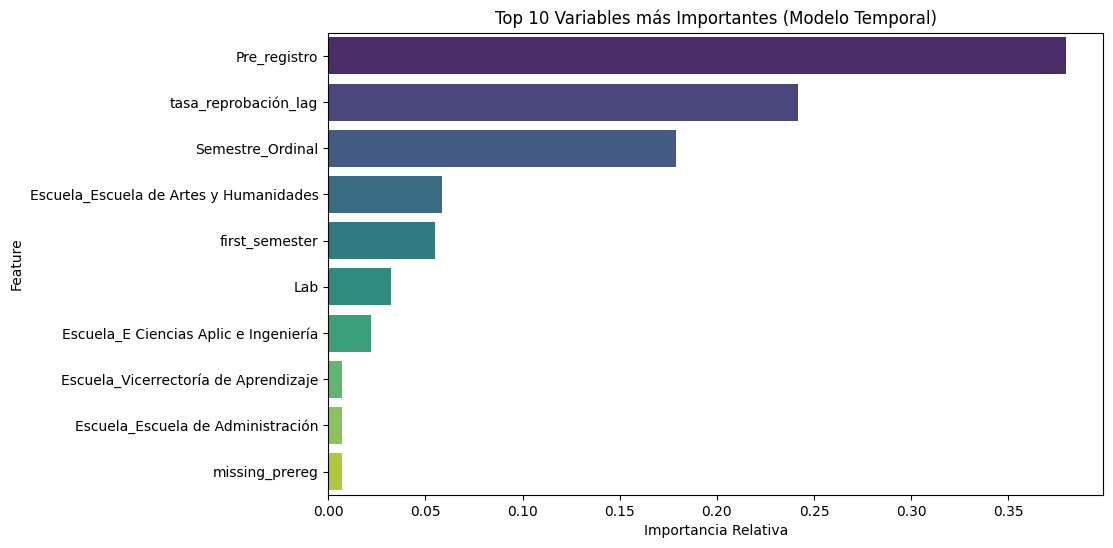

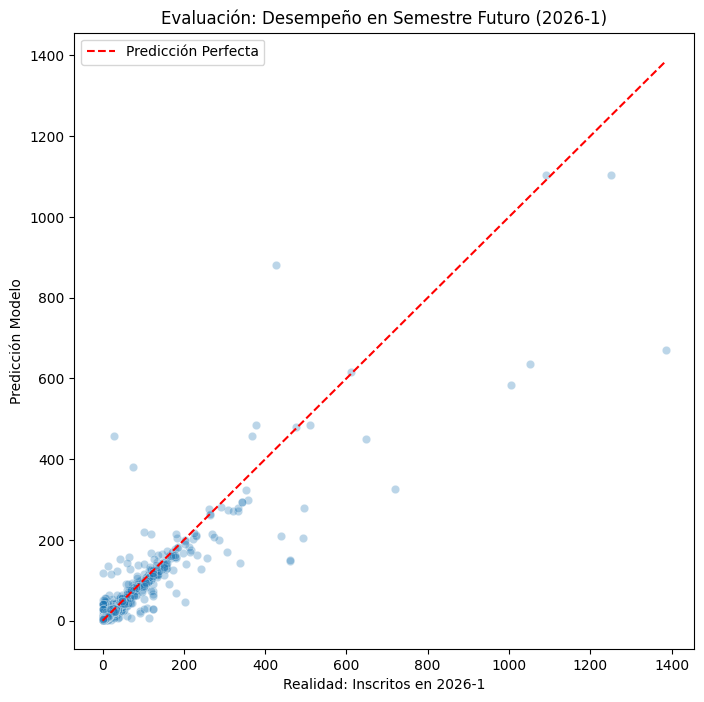

In [ ]:

# ==========================================
# PASO 6: INTERPRETACIÓN (FEATURE IMPORTANCE)
# ==========================================

# Usamos X_train.columns para asegurar que coincida con el modelo entrenado
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')
plt.title('Top 10 Variables más Importantes (Modelo Temporal)')
plt.xlabel('Importancia Relativa')
plt.show()

# ==========================================
# PASO 7: VISUALIZACIÓN REAL VS PREDICHO
# ==========================================

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
# Línea de perfección
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Predicción Perfecta')

plt.xlabel(f'Realidad: Inscritos en {ultimo_semestre}')
plt.ylabel(f'Predicción Modelo')
plt.title(f'Evaluación: Desempeño en Semestre Futuro ({ultimo_semestre})')
plt.legend()
plt.show()

##### **Model Performance Analysis (Test Set: 2026-1)**

The Random Forest model was evaluated using a strict **Walk-Forward Validation**, training on historical data (2018-2025) and testing exclusively on the most recent semester (**2026-1**). This simulates the real-world production scenario.

**Key Metrics & Interpretation**

* **R² (Explained Variance): 0.8171**
    * **Verdict:** Excellent.
    * **Interpretation:** The model explains **81.7%** of the variability in student demand for the new semester. In the context of human behavior and social dynamics, an R² > 0.70 is typically considered strong. Achieving >0.80 on "future" data indicates high robustness.

* **MAE (Mean Absolute Error): 10.72 Students**
    * **Verdict:** Highly Actionable.
    * **Business Impact:** On average, the model misses the exact count by ~11 students.
    * **Context:** Since a standard university course group typically holds 30-40 students, an error of 11 students represents roughly **±0.3 of a group**. This margin of error is low enough that it rarely affects the decision of whether to open an additional group (integer rounding usually absorbs this error).

* **RMSE (Root Mean Squared Error): 39.77 Students**
    * **Observation:** The gap between MAE (10.7) and RMSE (39.8) is significant.
    * **Diagnosis:** RMSE penalizes large errors more heavily. This suggests the presence of **Outliers**—likely massive lectures (Cátedras) where the model might miss by 50-100 students, while remaining very accurate for the majority of standard courses.

>**Conclusion:**  
>
>Unlike the traditional approach, which relied exclusively on pre-registration data (often a biased or incomplete signal of intent), this solution deploys a robust multivariate model that accurately forecasts the final student headcount (Total_Inscritos).
>
>By bridging the gap between expressed intent and actual behavior, the Academic Registry can transition from reactive estimation to strategic capacity planning. This empowers the administration to define the optimal number of groups based on predicted reality, significantly reducing the operational friction of last-minute adjustments and ensuring efficient resource allocation.

---

### 8.4. How do the results differ when the model is run with dirty data?
* Run again with dirty data and compare

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==========================================
# 1. SELECCIÓN DE VARIABLES (CRUDAS)
# ==========================================

# Solo podemos usar las numéricas originales.
# 'Escuela' y 'Semestre' (como predictor) se eliminan porque requieren encoding.
features_crudas = [
    'Pre_registro', 
    'tasa_reprobación_lag', 
    'first_semester', 
    'Lab'
]

# Copiamos df_final para no alterar el original
df_naive = df_final.copy()

# ==========================================
# 2. "SIN LIMPIEZA" -> BORRADO MASIVO
# ==========================================
print(f"Dimensiones originales: {df_naive.shape}")

# Como no podemos imputar (limpiar), debemos borrar cualquier fila con dato faltante
# para que el algoritmo matemático funcione.
df_naive = df_naive.dropna(subset=features_crudas)

print(f"Dimensiones tras borrar nulos: {df_naive.shape}")
print(f"Datos perdidos: {df_final.shape[0] - df_naive.shape[0]} filas eliminadas (incluyendo todo 2022).")

# ==========================================
# 3. SPLIT TEMPORAL
# ==========================================
# Usamos Semestre solo para dividir, no como variable de entrada
ultimo_semestre = df_naive['Semestre'].max()

X = df_naive[features_crudas]
y = df_naive['Total_Inscritos']

# Máscaras de tiempo
mask_test = df_naive['Semestre'] == ultimo_semestre
mask_train = df_naive['Semestre'] < ultimo_semestre

X_train, X_test = X[mask_train], X[mask_test]
y_train, y_test = y[mask_train], y[mask_test]

print(f"Entrenando con: {X_train.shape[0]} registros")
print(f"Probando con:   {X_test.shape[0]} registros")

# ==========================================
# 4. ENTRENAMIENTO (MODELO INGENUO)
# ==========================================
rf_naive = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_naive.fit(X_train, y_train)

# ==========================================
# 5. EVALUACIÓN
# ==========================================
y_pred_naive = rf_naive.predict(X_test)

r2 = r2_score(y_test, y_pred_naive)
mae = mean_absolute_error(y_test, y_pred_naive)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_naive))

print("\n--- RESULTADOS DEL MODELO 'CRUDO' ---")
print(f"R² Score: {r2:.4f}")
print(f"MAE:      {mae:.2f} estudiantes")
print(f"RMSE:     {rmse:.2f} estudiantes")

Dimensiones originales: (12607, 14)
Dimensiones tras borrar nulos: (7921, 14)
Datos perdidos: 4686 filas eliminadas (incluyendo todo 2022).
Entrenando con: 6737 registros
Probando con:   1184 registros

--- RESULTADOS DEL MODELO 'CRUDO' ---
R² Score: 0.7475
MAE:      12.51 estudiantes
RMSE:     52.06 estudiantes


>##### **The Value of Data Engineering**
>
>To validate the impact of our data cleaning and imputation strategies (specifically handling the "2022 Data Blackout" and the >"Cold Start" problem), we compared our final model against a **Baseline Model** that simply discarded missing values.
>
>**The Results**:  
>The "Naive Approach" of dropping missing data resulted in:
>1.  **Massive Information Loss:** We lost **37% of the entire dataset** (4,686 rows), including the entire year of 2022. This >blinded the model to recent post-pandemic trends.
>2.  **Performance Degradation:**
>    * **R² dropped from 0.82 to 0.75.**
>    * **RMSE spiked by 31%** (from 39.8 to 52.1), meaning the naive model fails catastrophically on large or complex courses.
>
>**Conclusion**:
> 
>This comparison proves that the **Smart Imputation Strategy** (using flags for 2022 and hierarchical means for new subjects) was the key driver of success. It allowed the model to learn from **4,300+ additional records** that would have otherwise been discarded, directly translating into a **more accurate and robust tool** for the university's resource planning.

---
### ***Statement on AI Tool Usage and Academic Integrity***

For the development and refinement of this analysis, Generative Artificial Intelligence tools (**Google Gemini** and **Claude**) were utilized, serving as **technical copilots**.

The use of these tools was strictly limited to:
* **Code Optimization:** Refinement of `pandas` and `scikit-learn` syntax to ensure efficient computational performance.
* **Conceptual Deepening:** Validation of statistical hypotheses and theoretical justification of imputation strategies (e.g., handling the *Cold Start* problem).
* **Debugging:** Identification and correction of errors within the data pipeline.

**Statement of Responsibility:**
We affirm that we **understand, validate, and assume full responsibility** for every line of code executed and every chart interpreted in this document. While AI functioned as a support assistant, the **modeling strategy, business decision-making, and ethical leadership** regarding the presented conclusions remain 100% the authorship and judgment of the students.

---